In [0]:
import tensorflow as tf

In [2]:
data = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [22]:
(x_train, y_train), (x_test, y_test) = data
print(len(x_train), len(y_train))
x_train = x_train/255
x_test = x_test/255

60000 60000


In [0]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128, activation = "relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation = "softmax")
])

In [0]:
model.compile(optimizer = 'adam', loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])

In [46]:
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0426 - accuracy: 0.9868 - val_loss: 0.0691 - val_accuracy: 0.9812
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0382 - accuracy: 0.9875 - val_loss: 0.0697 - val_accuracy: 0.9803
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0365 - accuracy: 0.9877 - val_loss: 0.0718 - val_accuracy: 0.9795
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0341 - accuracy: 0.9888 - val_loss: 0.0727 - val_accuracy: 0.9808
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0320 - accuracy: 0.9891 - val_loss: 0.0782 - val_accuracy: 0.9798
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0296 - accuracy: 0.9900 - val_loss: 0.0761 - val_accuracy: 0.9802
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0290 - accuracy: 0.9896 - val_loss: 0.0777 - val_accuracy:

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
##model.predict_classes(x_test) is deprecated, so it is recommended to use np.argmax(model.predict(x), axis=-1)
import numpy as np
print(confusion_matrix(y_test, np.argmax(model.predict(x_test), axis =-1)))
print(classification_report(y_test, np.argmax(model.predict(x_test), axis =-1)))



[[ 974    1    0    1    0    0    2    1    1    0]
 [   0 1123    3    1    0    0    2    0    6    0]
 [   4    0 1003    6    3    0    3    6    7    0]
 [   0    0    3  992    0    7    0    4    3    1]
 [   2    0    1    0  964    0    5    3    2    5]
 [   2    0    0    7    1  874    4    1    2    1]
 [   3    2    0    1    2    5  945    0    0    0]
 [   1    7    6    3    0    0    0 1007    2    2]
 [   7    0    2    3    3    3    3    6  946    1]
 [   2    5    0    9    8    5    0    9    4  967]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.97      0.98   

In [0]:
import matplotlib.pyplot as plt

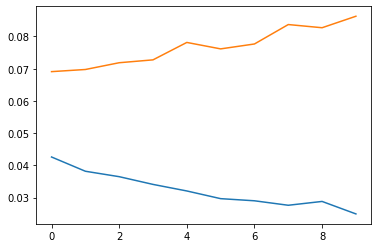

In [51]:
r.history
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.axes()